In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
# https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python -> dataset
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Cleaning

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# No Null Values

In [5]:
# Dropping Customer Id col as it is of no use
df.drop('CustomerID', axis = 1, inplace = True)

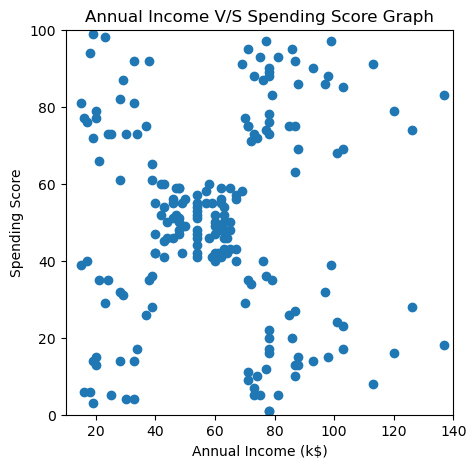

In [6]:
fig = plt.figure(figsize = (5,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Annual Income V/S Spending Score Graph')
plt.xlim(10,140)
plt.ylim(0,100)

fig.savefig('Annual_Income_VS_Spending_Score_Graph.jpeg')

Here we can see that one cluster has high density where as otheres have low density, so it is good to use DBSCAN algorithm for clustering here as it is good at separating clusters of high density and low denstiy

In [7]:
from sklearn.cluster import DBSCAN
# we will use only annual income and spending score for clustering
# so it will be ok if we do not encode gender col

In [8]:
data = df.iloc[:,[2,3]].values

In [9]:
data[:5] # Numpy Array

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [10]:
# i Tried many combinations for eps and min_samples manually from 1 to 10.
# this were the params, haveing best silhouette score.
model = DBSCAN(eps = 9, min_samples = 3)
model.fit(data)

DBSCAN(eps=9, min_samples=3)

In [11]:
labels = model.labels_
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

# -1 -> means that data point is outlier

In [12]:
from sklearn import metrics
metrics.silhouette_score(data,labels)

0.475053701963407

In [13]:
# silhouette_score is good and nearer to 1 than -1
df['cluster'] = labels

In [14]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,0


In [15]:
# Groupping the data according to clusters
plot_list = list()
for i in range(0,len(np.unique(labels)-1)):
    plot_list.append(df[df['cluster'] == i])
outliers = df[df['cluster'] == -1]

In [16]:
plot_list[0] # contains all datapoints which are in cluster zero
# Does not contain the datapoints which are outliers i.e -1.

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,0
4,Female,31,17,40,0
16,Female,35,21,35,0
18,Male,52,23,29,0
20,Male,35,24,35,0
26,Female,45,28,32,0
28,Female,40,29,31,0


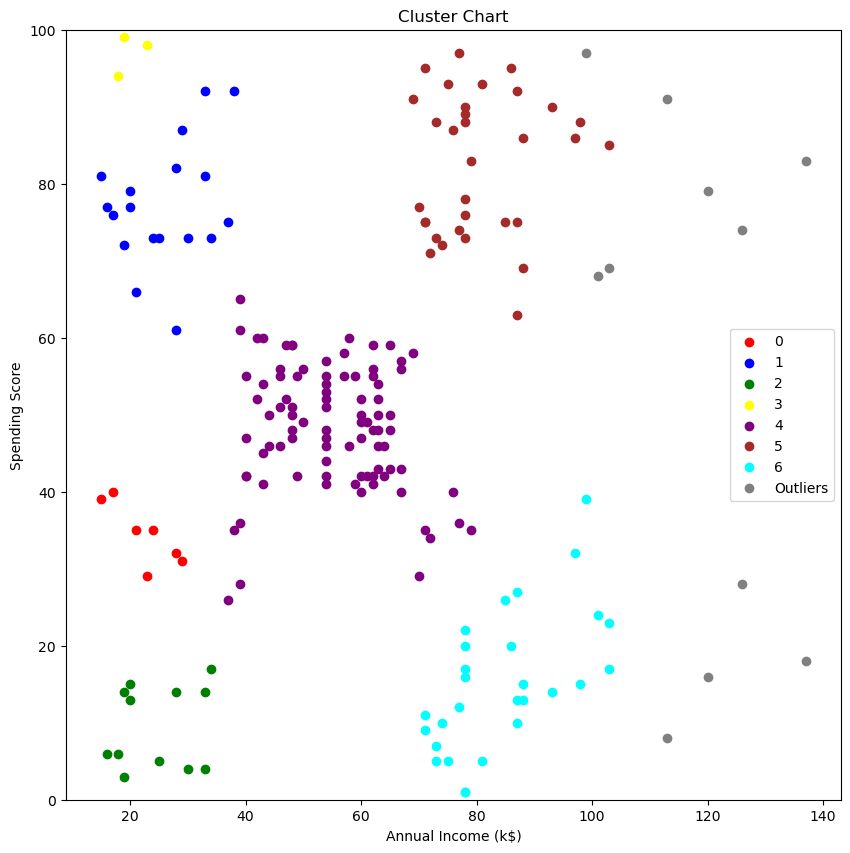

In [17]:
fig = plt.figure(figsize = (10,10))
plt.scatter(plot_list[0]['Annual Income (k$)'], plot_list[0]['Spending Score (1-100)'], color = 'red', label = 0)
plt.scatter(plot_list[1]['Annual Income (k$)'], plot_list[1]['Spending Score (1-100)'], color = 'blue', label = 1)
plt.scatter(plot_list[2]['Annual Income (k$)'], plot_list[2]['Spending Score (1-100)'], color = 'green', label = 2)
plt.scatter(plot_list[3]['Annual Income (k$)'], plot_list[3]['Spending Score (1-100)'], color = 'yellow', label = 3 )
plt.scatter(plot_list[4]['Annual Income (k$)'], plot_list[4]['Spending Score (1-100)'], color = 'purple', label = 4)
plt.scatter(plot_list[5]['Annual Income (k$)'], plot_list[5]['Spending Score (1-100)'], color = 'brown', label = 5)
plt.scatter(plot_list[6]['Annual Income (k$)'], plot_list[6]['Spending Score (1-100)'], color = 'cyan', label = 6)
plt.scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], color = 'grey', label = 'Outliers')
plt.legend()

plt.title('Cluster Chart')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.ylim(0,100)

fig.savefig('Cluster_Scatter_plot.jpg')

In [18]:
import joblib 
joblib.dump(model,'DBSCAN_model.pkl',)

['DBSCAN_model.pkl']